# TE Image processing

Import the necessary modules and activate inline plotting.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Define two functions for displaying images and plotting histograms.

In [2]:
def show(img):
    # check if the image is color (dim=3) or black and white (dim=2)
    if len(img.shape)==3:
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plot = plt.imshow(img2)
    else:
        plot = plt.imshow(img, cmap='gray')

In [3]:
def histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

## 6 Image processing

(194, 192, 3)


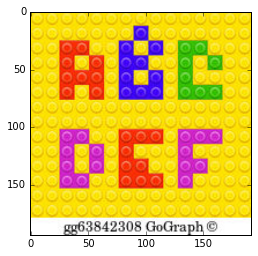

In [24]:
img = cv2.imread("abc.jpg")
print(img.shape)
show(img)

Translate image by (40, 60) and show

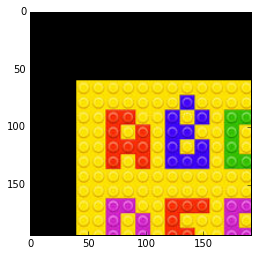

In [31]:
M = np.float32([[1, 0, 40], 
                [0, 1, 60]])
img2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
show(img2)

Rotate the output by 45° and show

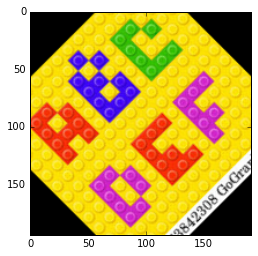

In [36]:
(h, w) = img.shape[:2]
center=(h/2, w/2)

M=cv2.getRotationMatrix2D(center, 45, 1.0)
img2=cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
show(img2)

Flip the previos result horizontally and show

## 7 Histograms

Transform to gray-scale image and show

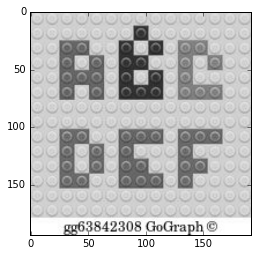

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

Show a histogram

In [6]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

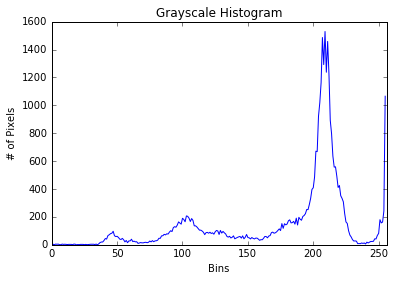

In [7]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

What is the region around
- 50 Le texte en bas et la lettre B
- 100 Les lettre A C D E et F
- 200 Le fond jaune
- 250 La bande blanche

Place a red rectangle around letter C

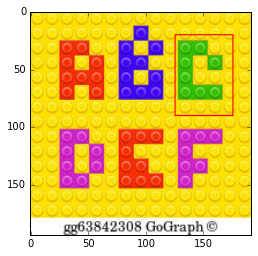

In [8]:
img3 = img.copy()
cv2.rectangle(img3, (125, 20), (175, 90), (0, 0, 255))
show(img3)

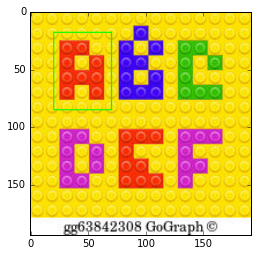

In [40]:
img4 = img.copy()
cv2.rectangle(img4, (20, 18), (70, 85), (0, 255, 0))
show(img4)

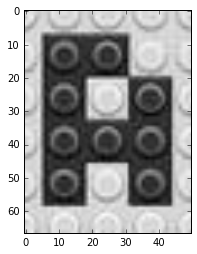

In [41]:
lettre_A = gray[18:85, 20:70]
show(lettre_A)

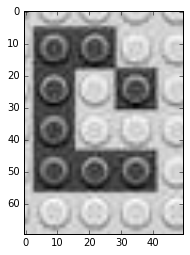

In [9]:
letter_C = gray[20:90, 125:175]
show(letter_C)

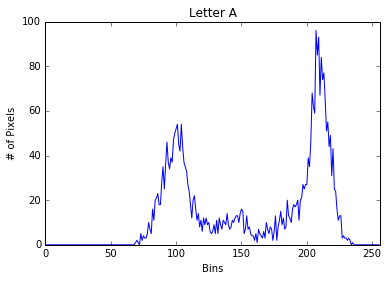

In [42]:
hist_C = cv2.calcHist([lettre_A], [0], None, [256], [0, 256])
histogram(hist_C, "Letter A")

## 8 Smoothing

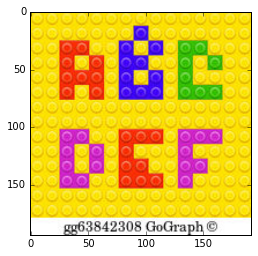

In [11]:
show(img)

(100, 192, 3)


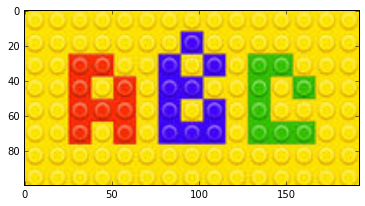

In [12]:
img2 = img[0:100, :, :]
print(img2.shape)
show(img2)

Show 3 horizontally stacked blurred images with a blur size of 3, 5, 7

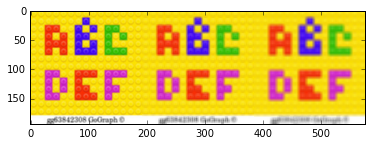

In [13]:
blurred = np.hstack([
    cv2.blur(img, (3,3)),
    cv2.blur(img, (5,5)),
    cv2.blur(img, (7,7))
])
show(blurred)

## 9 Thresholding

Transform into grayscale and select appropriate binary threshold, based on previous histogram, to show the letters in black.

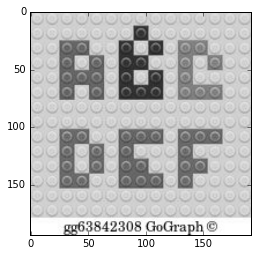

In [14]:
show(gray)

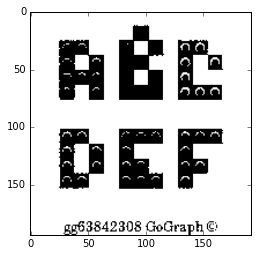

In [15]:
(T, thresh) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
show(thresh)

Show the letters in white (THRESH_BINARY_INV).

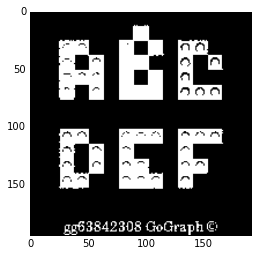

In [16]:
(T, thresh2) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
show(thresh2)

## 10 Edge detection

Blur the grayscale image by (5,5), then use Canny edge detection and show the result.

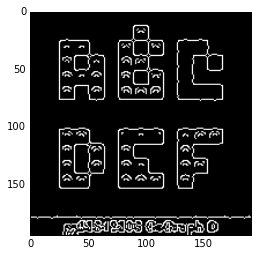

In [17]:
gray2 = cv2.blur(gray, (3, 3))
canny = cv2.Canny(gray2, 100, 150)
show(canny)

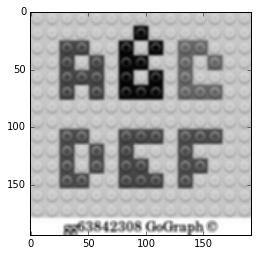

In [18]:
show(gray2)

## 11 Contours

Only use the top 170 pixels

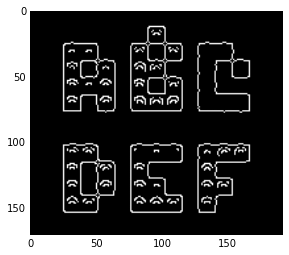

In [19]:
canny2 = canny[0:170, :]
show(canny2)

In [20]:
(_, cnts, _) = cv2.findContours(canny2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(cnts))

6
